## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [3]:
mouse_metadata_path = pd.read_csv("./data/Mouse_metadata.csv")
mouse_metadata_path.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results_path = pd.read_csv("./data/Study_results.csv")
study_results_path.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
merge_df = pd.merge(mouse_metadata_path, study_results_path, on="Mouse ID", how="inner")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
unique_mice_df = len(merge_df['Mouse ID'].unique().tolist())

total_mice_df = pd.DataFrame({'Total Number of Mice': [unique_mice_df]})
total_mice_df

,Total Number of Mice
0,249


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Good_Mice = merge_df.groupby(["Mouse ID"])
duplicates = Good_Mice["Timepoint"].value_counts()
duplicates_df = duplicates.to_frame()
Bad_Mice_df = duplicates_df.loc[(duplicates_df["Timepoint"]>1)]
Bad_Mice_df

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = merge_df.loc[merge_df['Mouse ID'] == "g989"]
g989_df.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merge_df.loc[merge_df['Mouse ID']!='g989']
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
#Remane Drug Regimen and Metastatic Sites to Deal with Spaces
clean_tidy_df = clean_data_df.rename(columns = {'Drug Regimen': 'Drug_Regimen', 'Tumor Volume (mm3)': 'Tumor_Volume', 'Metastatic Sites': 'Metastatic_Sites'}, inplace = False)
clean_tidy_df                                      

,Mouse ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
unique_clean_df = len(clean_data_df['Mouse ID'].unique().tolist())

total_clean_df = pd.DataFrame({'Total Number of Clean Mice': [unique_clean_df]})
total_clean_df

,Total Number of Clean Mice
0,248


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_group_df = clean_data_df.groupby('Drug Regimen')
drug_summary = pd.DataFrame({
    "Tumor Mean": drug_group_df["Tumor Volume (mm3)"].mean(),
    "Tumor Median": drug_group_df["Tumor Volume (mm3)"].median(),
    "Tumor Variance": drug_group_df["Tumor Volume (mm3)"].var(),
    "Tumor Standard Dev": drug_group_df["Tumor Volume (mm3)"].std(),
    "Tumor SEM": drug_group_df["Tumor Volume (mm3)"].sem()
})
drug_summary

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_group_df.agg({'Tumor Volume (mm3)':["median", "mean", "var", "std", "sem"]})


Tumor Volume (mm3)                                          
                         median       mean        var       std       sem
Drug Regimen                                                             
Capomulin             41.557809  40.675741  24.947764  4.994774  0.329346
Ceftamin              51.776157  52.591172  39.290177  6.268188  0.469821
Infubinol             51.820584  52.884795  43.128684  6.567243  0.492236
Ketapril              53.698743  55.235638  68.553577  8.279709  0.603860
Naftisol              52.509285  54.331565  66.173479  8.134708  0.596466
Placebo               52.288934  54.033581  61.168083  7.821003  0.581331
Propriva              50.446266  52.320930  43.852013  6.622085  0.544332
Ramicane              40.673236  40.216745  23.486704  4.846308  0.320955
Stelasyn              52.431737  54.233149  59.450562  7.710419  0.573111
Zoniferol             51.818479  53.236507  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Filter the DataFrame down only to those columns to chart
mouse_count_df=clean_tidy_df['Drug_Regimen'].value_counts() 
mouse_count_df.head(20)

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug_Regimen, dtype: int64

In [15]:
# Create an array that contains the number of users of each Regimen
mice_drug = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
x_axis = np.arange(len(mice_drug))

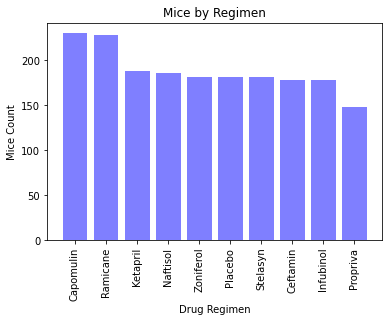

In [41]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, mice_drug, color='b', alpha=0.5, align="center")
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.title("Mice by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"], rotation="vertical")
plt.show()

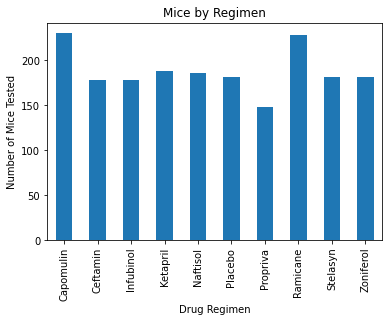

In [40]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mouse_drug = drug_group_df['Mouse ID'].count()
mouse_drug.plot(kind="bar")
plt.title("Mice by Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

In [18]:
gender_group=clean_tidy_df['Sex'].value_counts()
gender_group

Male      958
Female    922
Name: Sex, dtype: int64

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 922]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

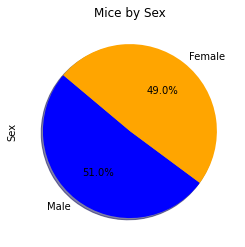

In [34]:
#Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.ylabel("Sex")
plt.title("Mice by Sex")
plt.show()


In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pies = ["Male", "Female"]
pie_votes = [958, 922]
colors = ["blue", "orange"]
explode = (0.1,0)

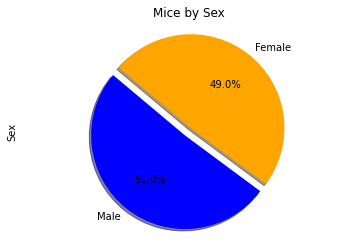

In [33]:
# Creates the pie chart based upon the values above
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.ylabel("Sex")
plt.title("Mice by Sex")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyPies.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time_max = (clean_data_df.groupby('Mouse ID').max()["Timepoint"]).reset_index()
time_max
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_merge_df = pd.merge(time_max, clean_data_df, on=["Mouse ID", "Timepoint"], how="left")
max_merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for x in drug_list:
    drug_vol=max_merge_df.loc[max_merge_df['Drug Regimen'] == x]['Tumor Volume (mm3)']
    tumor_vol.append(drug_vol)
    #print(drug_vol)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = drug_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{x} Outliers: {drug_vol.loc[(drug_vol< lower_bound) | (drug_vol> upper_bound)]}")
    
    # add subset       

Capomulin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


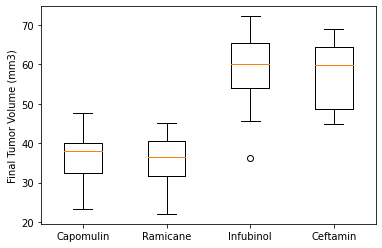

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels= drug_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Find a list of mice treated with Capomulin
Capomulin = clean_tidy_df.loc[clean_tidy_df['Drug_Regimen'] == "Capomulin"]
Capomulin

,Mouse ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume,Metastatic_Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [27]:
#Create a data set of your chosen mouse's Tumor Volume and Timepoint
s185_df = clean_tidy_df.loc[clean_tidy_df['Mouse ID'] == "s185"]
s185_df.head(20)

,Mouse ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume,Metastatic_Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [28]:
# Create the X and Y axis lists
time = np.arange(0,50,5)
tumor_volume = [45.000000, 43.878496, 37.614948, 38.177232, 36.866876, 33.949940, 32.959671, 28.328531, 25.472143	, 23.343598]

Text(0, 0.5, 'Tumor Volume (mm3)')

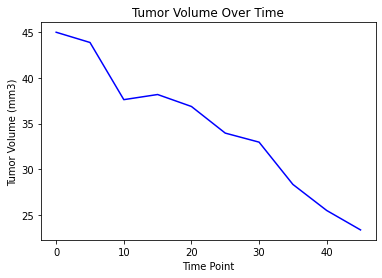

In [29]:
# Plot the charts and apply some styling
volume, = plt.plot(time, tumor_volume, color="blue", label="Tumor Volume")
# Add labels to X and Y axes :: Add title
plt.title("Tumor Volume Over Time")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = clean_tidy_df.loc[clean_tidy_df['Drug_Regimen'] == "Capomulin"]
Capomulin
cap_mouse = Capomulin.groupby('Mouse ID').mean()
cap_mouse

,Age_months,Weight (g),Timepoint,Tumor_Volume,Metastatic_Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


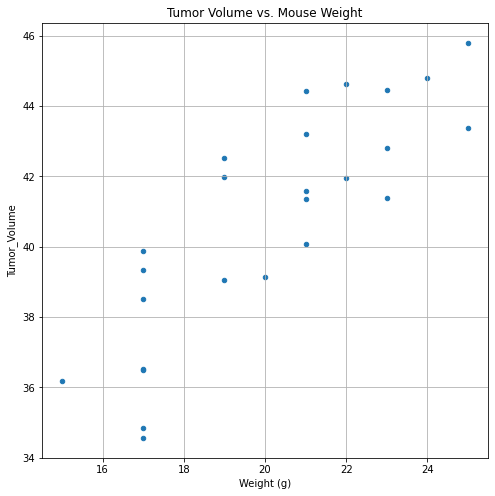

In [31]:
cap_mouse.plot(kind="scatter", x="Weight (g)", y="Tumor_Volume", grid=True, figsize=(8,8),
               title="Tumor Volume vs. Mouse Weight")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.7088568047708717


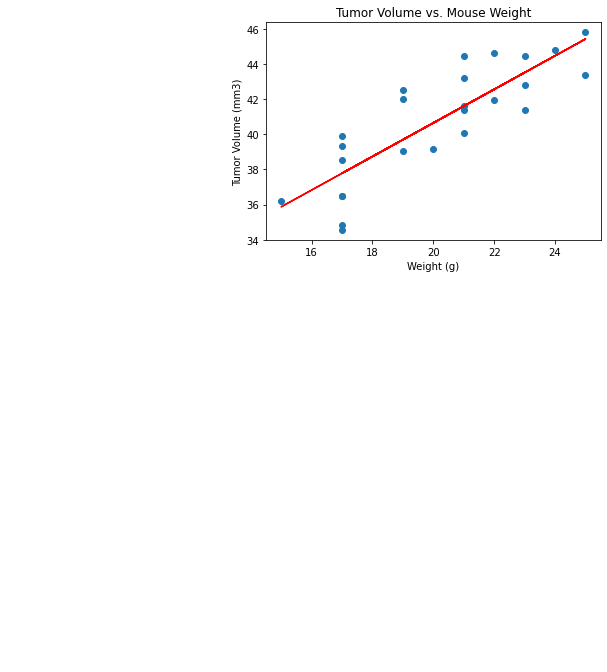

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Plot out rooms versus median house price
x_values = cap_mouse['Weight (g)']
y_values = cap_mouse['Tumor_Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Tumor Volume vs. Mouse Weight")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is: {(rvalue**2)}")
plt.show()